### Load data

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0,module_path)

import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

from correlation_enrichment.library import SimilarityCalculator
from library_regulons import *


In [2]:
dataPath=module_path+'/data_expression/'
genes = pd.read_csv(dataPath + 'mergedGenes_RPKUM.tsv', sep='\t', index_col=0)
conditions = pd.read_csv(dataPath + 'conditions_mergedGenes.tsv', sep='\t', index_col=None)
neighbour_calculator = NeighbourCalculator(genes,conditions=conditions,conditions_names_column='Measurment')

### Avaliable replicates for determining  genes with at least how similar neighbour should still be used

In [3]:
set(conditions.loc[:,'Replicate'])

{'AX4_FDpool01',
 'AX4_FDpool02',
 'AX4_bio1',
 'AX4_bio2',
 'AX4_bio3',
 'AX4_pool19',
 'AX4_pool21',
 'AX4_r1',
 'AX4_r2',
 'ac3pkaCoe_r1',
 'ac3pkaCoe_r2',
 'comH_r1',
 'comH_r2',
 'cudA_r2',
 'cudA_r3',
 'dgcA_r1',
 'dgcA_r2',
 'ecmA_bio1',
 'ecmA_bio2',
 'gbfA_r1',
 'gbfA_r3',
 'gtaG_r1',
 'gtaG_r2',
 'gtaI_bio1',
 'gtaI_bio2',
 'mybBGFP_bio1',
 'mybBGFP_bio2',
 'mybB_bio1',
 'mybB_bio2',
 'pkaCoeAX4_r2',
 'pkaCoeAX4_r3',
 'pkaR_bio1',
 'pkaR_bio2',
 'tagB_bio1',
 'tagB_bio2',
 'tgrB1C1_r1',
 'tgrB1C1_r2',
 'tgrB1_r1',
 'tgrB1_r2',
 'tgrC1_r1',
 'tgrC1_r2'}

/home/karin/Documents/git/orange3venv/lib/python3.6/site-packages/numba/ir_utils.py:1959: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'forest' of function 'initialise_search'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../orange3venv/lib/python3.6/site-packages/pynndescent/pynndescent_.py", line 72:
@numba.njit()
def initialise_search(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/home/karin/Documents/git/baylor-dicty/correlation_enrichment/library.py:235: RuntimeWarning: invalid value encountered in double_scalars
  return np.inner(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))


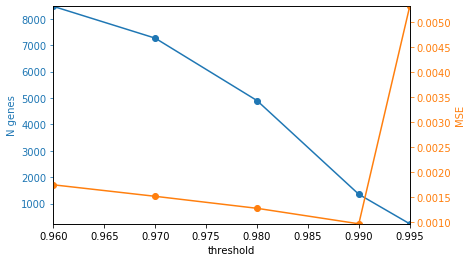

In [4]:
neighbour_calculator.plot_select_threshold(thresholds=[0.96,0.97,0.98,0.99,0.995],filter_column='Replicate',
                                           filter_column_values_sub=['AX4_pool19',
 'AX4_pool21',
 'AX4_r1',
 'AX4_r2',
 'ac3pkaCoe_r1',
 'ac3pkaCoe_r2',
 'comH_r1',
 'comH_r2',
 'cudA_r2',
 'cudA_r3',
 'dgcA_r1',
 'dgcA_r2',
 'ecmA_bio1',
 'ecmA_bio2',
 'gbfA_r1',
 'gbfA_r3'],filter_column_values_test=['tagB_bio1',
 'tagB_bio2',
 'tgrB1C1_r1',
 'tgrB1C1_r2',
 'tgrB1_r1'])

In [5]:
result = neighbour_calculator.neighbours(2, inverse=False)
hcl = HierarchicalClustering(result, genes, 0.995, inverse=False)

In [6]:
ca=ClusterAnalyser(genes.index)

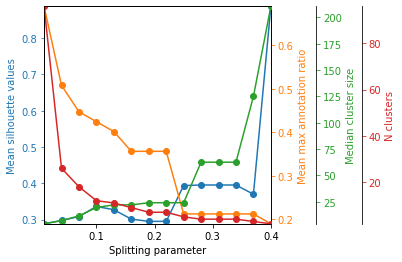

In [7]:
ca.plot_clustering_metrics(clustering=hcl, splittings=np.arange(0.01,0.4,0.03))

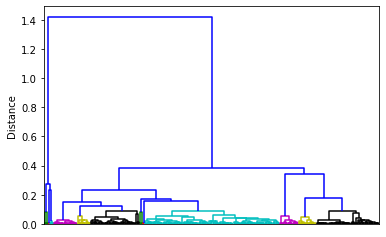

In [8]:
hcl.plot_clustering(cutting_distance=0.1)

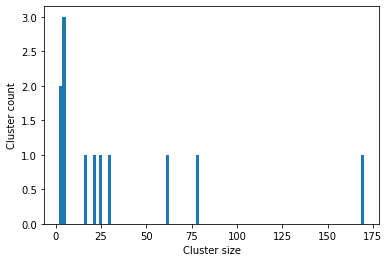

In [9]:
hcl.plot_cluster_sizes(splitting=0.1)